# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = ваш балл + котобонус

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

SEED = 42

random.seed(SEED)
np.random.seed(SEED)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

**Для воспроизводимости**

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ

Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(10, random_state=SEED)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
pd.concat([df_test.head(5), df_test.tail(5)], axis=0)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [5]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [6]:
df_train.duplicated(keep=False).sum()

np.int64(1478)

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [7]:
all_dupls_mask = df_train.drop("selling_price", axis=1).duplicated(keep=False)
repeat_dupls_mask = df_train.drop("selling_price", axis=1).duplicated(keep="first")

print(f"Вообще всех дубликатов: {all_dupls_mask.sum()}")
print(f"Только повторяющихся: {repeat_dupls_mask.sum()}")

Вообще всех дубликатов: 1799
Только повторяющихся: 1159


In [8]:
df_train.loc[all_dupls_mask]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [9]:
df_train = df_train.loc[~repeat_dupls_mask].reset_index(drop=True)
assert df_train.shape == (5840, 13)

df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``

In [10]:
def normalize_features(data):
    data = data.rename({"mileage": "fuel_consumption", "engine": "engine_vol"}, axis=1)
    # Будем считать, что литр топлива весит 1 кг
    data["fuel_consumption"] = data["fuel_consumption"].str.replace(" kmpl", "").str.replace(" km/kg", "").astype(float)
    data["max_power"] = data["max_power"].str.replace(" bhp", "").replace("", np.nan).astype(float)
    data["engine_vol"] = data["engine_vol"].str.replace(" CC", "").astype(float)

    # Обороты не берем, умножаем на 10 где kgm (надо же как-то в ньютоны перевести)
    # Показал один из способов как обработать
    data["torque_measure"] = data["torque"].str.lower().str.extract(r"(kgm|nm)")
    data["torque"] = data["torque"].str.extract(r"([0-9.]+)").astype(float)
    data.loc[data["torque_measure"] == "kgm", "torque"] *= 10
    data = data.drop(["torque_measure", "torque"], axis=1) # просят удалить
    return data

df_train_raw = df_train.copy()
df_test_raw = df_test.copy()

df_train = normalize_features(df_train)
df_test = normalize_features(df_test)

**Из задания 1. Сначала преобразуем, потом заполним.**

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

In [11]:
# Пропуски только в числовых столбцах
medians = df_train.select_dtypes("number").median(axis=0)
medians

year                  2014.00
selling_price       405000.00
km_driven            70000.00
fuel_consumption        19.37
engine_vol            1248.00
max_power               81.86
seats                    5.00
dtype: float64

In [12]:
df_train_na = df_train.copy()
df_test_na = df_test.copy()

df_train = df_train.fillna(medians)
df_test = df_test.fillna(medians)
df_train.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
fuel_consumption    0
engine_vol          0
max_power           0
seats               0
dtype: int64

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно.

- [ ] Осуществите приведение столбцов к необходимому типу (столбцы ``engine`` и ``seats`` к приведем к `int`)

In [13]:
for col in ["engine_vol", "seats"]:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)

In [14]:
df_train.dtypes

name                 object
year                  int64
selling_price         int64
km_driven             int64
fuel                 object
seller_type          object
transmission         object
owner                object
fuel_consumption    float64
engine_vol            int64
max_power           float64
seats                 int64
dtype: object

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [15]:
df_train.describe()

,year,selling_price,km_driven,fuel_consumption,engine_vol,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [16]:
df_test.describe()

,year,selling_price,km_driven,fuel_consumption,engine_vol,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,5.403000
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,9.000000


In [17]:
df_train.describe(include=["O"])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [18]:
df_test.describe(include=["O"])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


## **Визуализации**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
    - Можно ли предположить на основе распределений связь признаков с целевой переменной? **Да, мощностные характеристики показывают некоторую корреляцию (объем двигателя и мощность, а расход -- вообще мимо). Вероятна корреляция и с числом мест -- купе, например, будут подороже (`seats=2`). Год и пробег таже коррелируют, но нужно почистить от выбросов**
    - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков? - **Можно, опять же между мощностными характеристиками. А вот `seats` не коррелирует ни с чем. Расход топлива коррелирует разве что только с объемом мотора. Корреляцию между пробегом и годом нужно проверять отдельно.**

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?" **Очевидно да**

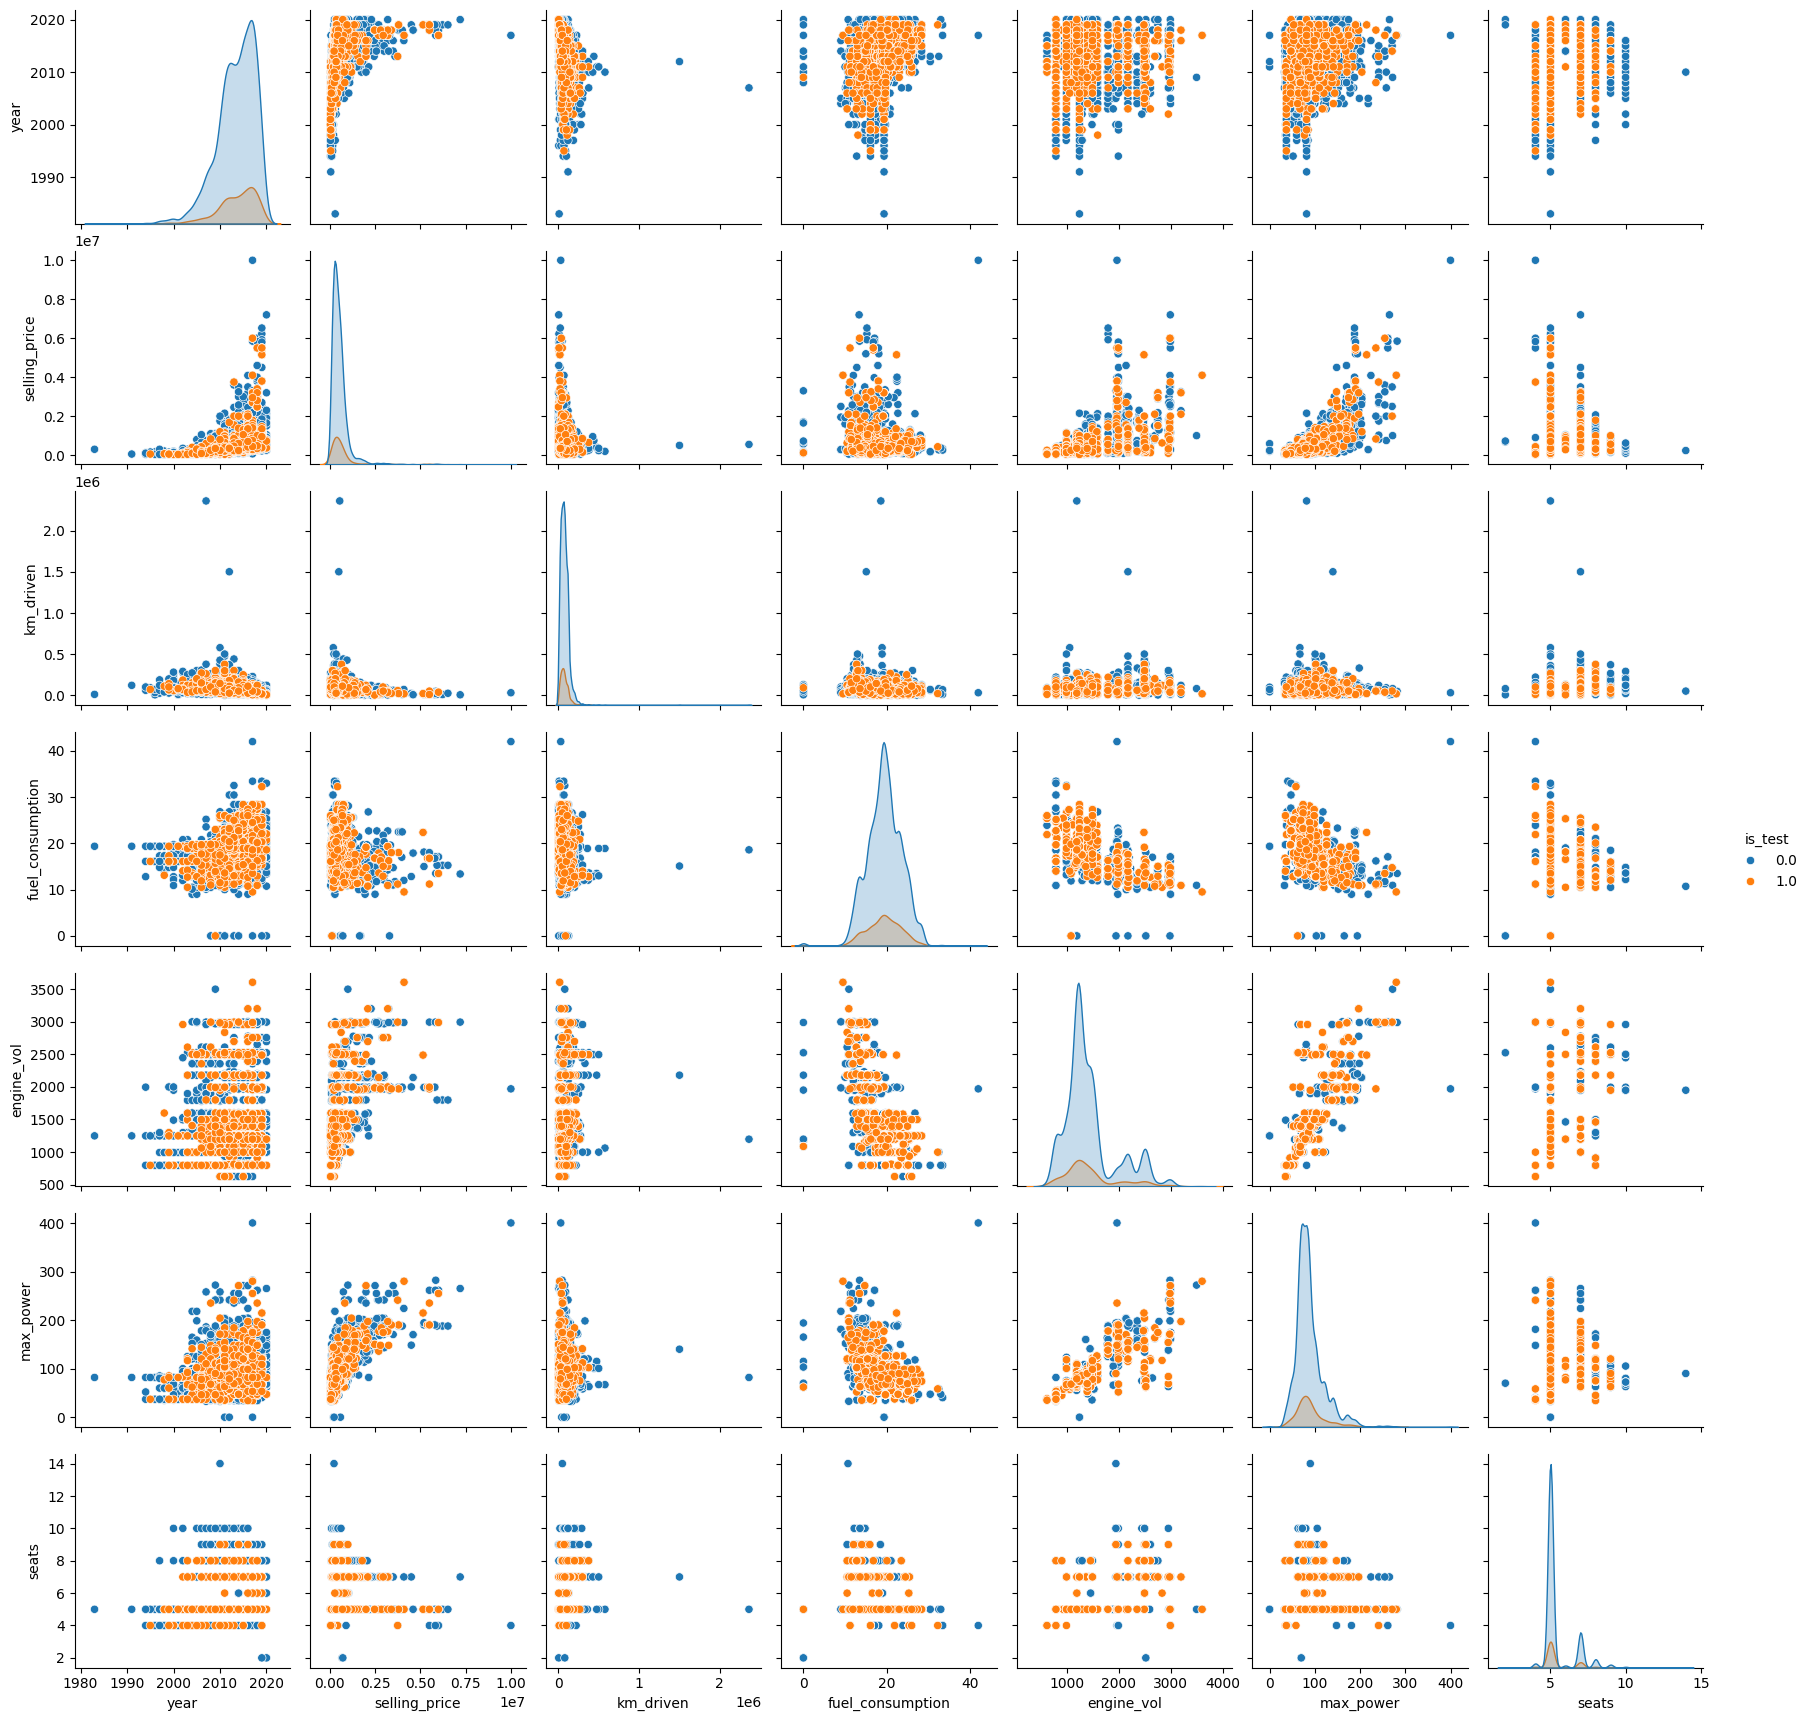

In [19]:
df_combined = df_train.copy()
df_combined["is_test"] = 0
df_combined = pd.concat([df_combined, df_test], axis=0)
df_combined["is_test"] = df_combined["is_test"].fillna(1)

sns.pairplot(df_combined, hue="is_test")
plt.show()

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


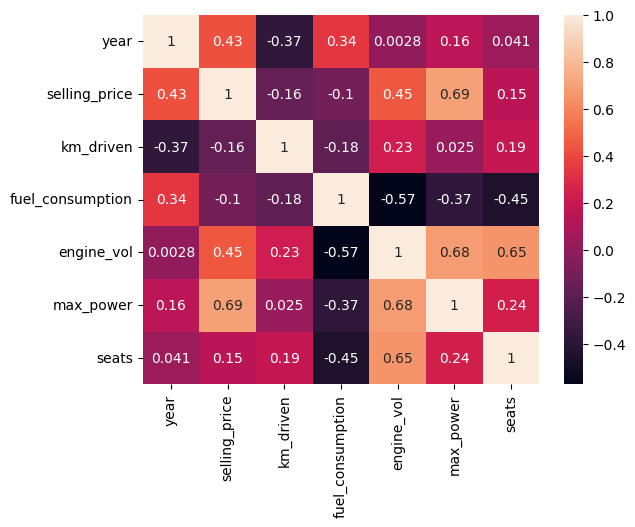

In [20]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True)
plt.show()

- [ ] Ответьте на вопросы:
    - Какие 2 признака наименее скоррелированы между собой? **Год и литраж**
    - Между какими наблюдается довольно сильная положительная линейная зависимость? **Мощность, литраж и цена. Корреляция между литражом и числом мест ложная.**
    - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи? **Если смотреть на циферку корреляции, то как будто бы да, но мы-то с вами люди умные -- визуально проверим**

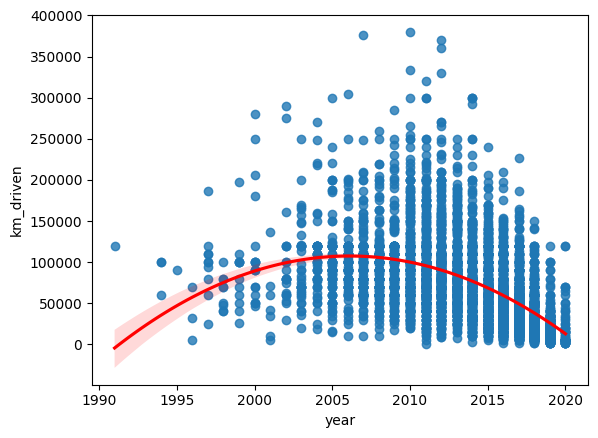

In [21]:
filt = df_train[(df_train["year"] > 1990) & (df_train["km_driven"] <= 400000)]
sns.regplot(filt, x="year", y="km_driven", order=2, line_kws=dict(color="r"))
plt.show()

Что-то никакой линейной зависимости мы тут не видим, верно? Я специально отобразил регплот с порядком 2 чтобы показать, что в среднем здесь нелинейная зависимость. Это обосновывается средним пробегом за каждый год:

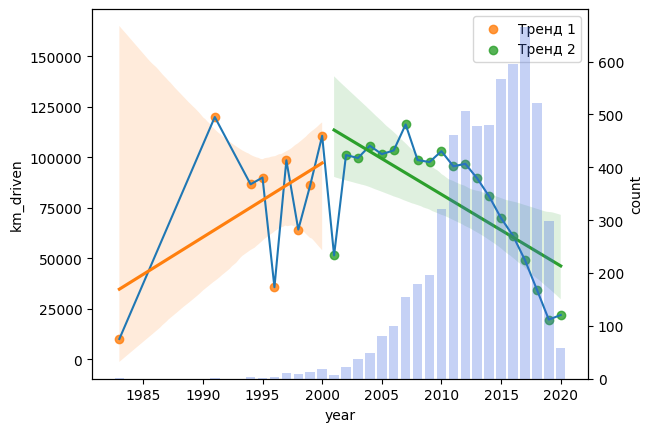

In [22]:
dfg = df_train.groupby("year")["km_driven"].mean().reset_index()
dfgc = df_train.groupby("year")["km_driven"].count().reset_index()

fig, ax1 = plt.subplots()
sns.lineplot(dfg, x="year", y="km_driven", ax=ax1)
sns.regplot(dfg[dfg["year"] <= 2000], x="year", y="km_driven", label="Тренд 1", ax=ax1)
sns.regplot(dfg[dfg["year"] > 2000], x="year", y="km_driven", label="Тренд 2", ax=ax1)
ax1.legend()

ax2 = ax1.twinx()
ax2.bar(dfgc["year"], dfgc["km_driven"], alpha=0.3, color="royalblue")
ax2.set_ylabel('count')

plt.show()

**По факту у нас зависимость с двумя трендами** -- до 2000 был расколбас с каким-никаким, но позитивным трендом, после 2000 -- явный нисходящий тренд. Проблема в том, что точек до 2000 достаточно мало, поэтому и возникает такой расколбас и по этой же причине в хитмепе видим цифру -0.37, так как у нас зеленый тренд представлен лучше. Если же мы выкинем точки до 2000 года, тогда этот показатель возрастет:

In [23]:
filt[filt["year"] >= 2000][["year", "km_driven"]].corr()

,year,km_driven
year,1.000000,-0.479986
km_driven,-0.479986,1.000000


Собственно, ответ на вопрос выше на самом деле **да**, но это будет более очевидно если мы выкинем выбросы

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


In [24]:
class Experiment(object):
    def __init__(self, model, X_train, y_train, X_test, y_test):
        self.d = {
            "model": model,
            "X_train": X_train,
            "y_train": y_train,
            "X_test": X_test,
            "y_test": y_test,
        }

    def __getitem__(self, key):
        return self.d[key]

experiments_dict = {}

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [25]:
y_train = df_train["selling_price"]
X_train = df_train.select_dtypes("number").drop("selling_price", axis=1)
assert X_train.shape == (5840, 6)

y_test = df_test["selling_price"]
X_test = df_test[X_train.columns]
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

def eval(y_true, y_pred):
    d = {
        "R2": r2_score(y_true, y_pred),
        "MSE": MSE(y_true, y_pred)
    }
    d["RMSE"] = np.sqrt(d["MSE"])
    return d

def print_metrics(model):
    for label, X, y in zip(["train", "test"], [X_train, X_test], [y_train, y_test]):
        print(f"{label.upper()}:")
        metrics = eval(y, model.predict(X))
        for metric_name, metric_val in metrics.items():
            print(f"    {metric_name}:  {' ' * (4 - len(metric_name))}{metric_val:.4f}")
        print()

**Я предлагаю также построить бейзлайн -- предикт средним (оптимальная контанта для всяких MSEшек**

In [27]:
class MeanModel(object):
    def __init__(self):
        self.mean = None
        
    def fit(self, X, y):
        self.mean = y.mean()
        return self

    def predict(self, X):
        return np.full(shape=(len(X),), fill_value=self.mean)

model = MeanModel().fit(X_train, y_train)
experiments_dict["exp_0_mean"] = Experiment(model, X_train, y_train, X_test, y_test)
print_metrics(model)

TRAIN:
    R2:    0.0000
    MSE:   286638338357.8865
    RMSE:  535386.1582

TEST:
    R2:    -0.0157
    MSE:   583842339797.0208
    RMSE:  764095.7661



In [28]:
model = LinearRegression().fit(X_train, y_train)
experiments_dict["exp_1_OLS"] = Experiment(model, X_train, y_train, X_test, y_test)
print_metrics(model)

TRAIN:
    R2:    0.5923
    MSE:   116874153930.0288
    RMSE:  341868.6209

TEST:
    R2:    0.5941
    MSE:   233298779730.4571
    RMSE:  483010.1238



**Ну какие выводы можем сделать? В среднем на тесте ошибаемся на 480 тысяч (рублей?), $R^2$ адекватный, переобучения нет**

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression()),
]).fit(X_train, y_train)

experiments_dict["exp_2_OLS_scaled"] = Experiment(model, X_train, y_train, X_test, y_test)
print_metrics(model)

TRAIN:
    R2:    0.5923
    MSE:   116874153930.0289
    RMSE:  341868.6209

TEST:
    R2:    0.5941
    MSE:   233298779730.4498
    RMSE:  483010.1238



**Это нормальная ситуация, что стандартизация не дала эффекта. Однако мы бы увидели другую картину, если бы порядок данных различался во много-много раз**

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены? **Наиболее важный признак -- это мощность**

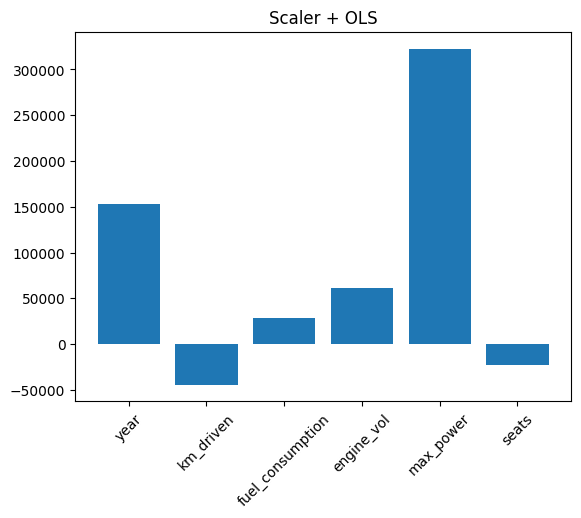

In [30]:
def plot_weights(model, title=None):
    coefs = model.coef_
    features = X_train.columns.to_list()
    
    plt.bar(features, coefs)
    plt.xticks(rotation=45)
    if title is not None:
        plt.title(title)
    plt.show()


plot_weights(model.steps[1][1], "Scaler + OLS")

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспользуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему. **Нет, просто потому что линии уровня функции потерь не соприкасаются с линиями уровня функционала регуляризации, т.е. все признаки более или менее значимы. С другой стороны, коэффициент регуляризации маловат, но я проверил -- чтобы хоть что-то занулилось в таком сеттинге, его нужно выставлять ну уж очень большим.**

TRAIN:
    R2:    0.5923
    MSE:   116874153940.1429
    RMSE:  341868.6209

TEST:
    R2:    0.5941
    MSE:   233299450599.1693
    RMSE:  483010.8183



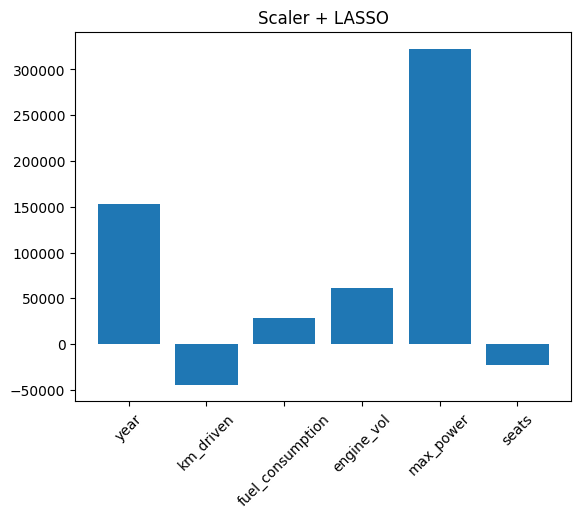

In [31]:
from sklearn.linear_model import Lasso

lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(random_state=SEED)),
]).fit(X_train, y_train)

experiments_dict["exp_3_Lasso_scaled"] = Experiment(lasso, X_train, y_train, X_test, y_test)
print_metrics(lasso)
plot_weights(lasso.steps[1][1], "Scaler + LASSO")

А давайте ради прикола мы выведем лассо без скейлера

TRAIN:
    R2:    0.5923
    MSE:   116874153932.2977
    RMSE:  341868.6209

TEST:
    R2:    0.5941
    MSE:   233298939031.5297
    RMSE:  483010.2887



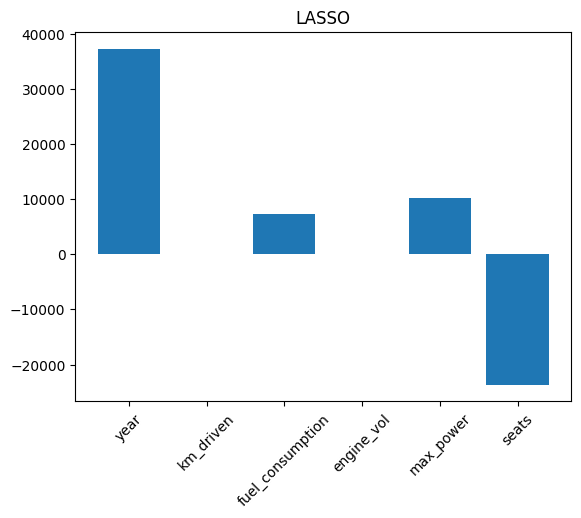

In [32]:
lasso = Lasso(random_state=SEED).fit(X_train, y_train)

experiments_dict["exp_4_Lasso"] = Experiment(lasso, X_train, y_train, X_test, y_test)
print_metrics(lasso)
plot_weights(lasso, "LASSO")

**Без использования стандартизации у нас сразу же занулились некоторые признаки, что объясняется их разным масштабом: пробег и объем двигателя -- крупные с точки зрения масштаба признаки, поэтому вес у них поменьше, что и выливается в их зануление, ведь параметр регуляризации влияет на все веса одинаково**

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
    - Сколько грид-сёрчу пришлось обучать моделей? **Так как это просто тупой перебор, то число моделей формируется как произведение количества параметров по всей сетке, помноженное на число фолдов CV. В нашем случае это 5000 * 10 = 50000 моделей.**
    - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации? **Лучше та модель, у которой минимальный коэффициент из переданных -- оно и без поиска понятно, вообще говоря. Ответ на второй вопрос на графике.**

In [33]:
from sklearn.model_selection import KFold

cv = KFold(10, shuffle=True, random_state=SEED)

In [34]:
from sklearn.model_selection import GridSearchCV


model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso()),
])

param_grid = {
    "model__alpha": np.linspace(0.0001, 100.0, 5000),
    "model__random_state": [SEED],
}

gs = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring="neg_mean_squared_error")
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.00000000e-04, 2.01039808e-02, 4.01079616e-02, ...,
       9.99599920e+01, 9.99799960e+01, 1.00000000e+02], shape=(5000,)),
                         'model__random_state': [42]},
             scoring='neg_mean_squared_error')

TRAIN:
    R2:    0.5923
    MSE:   116874252567.1795
    RMSE:  341868.7651

TEST:
    R2:    0.5940
    MSE:   233365851675.2124
    RMSE:  483079.5500



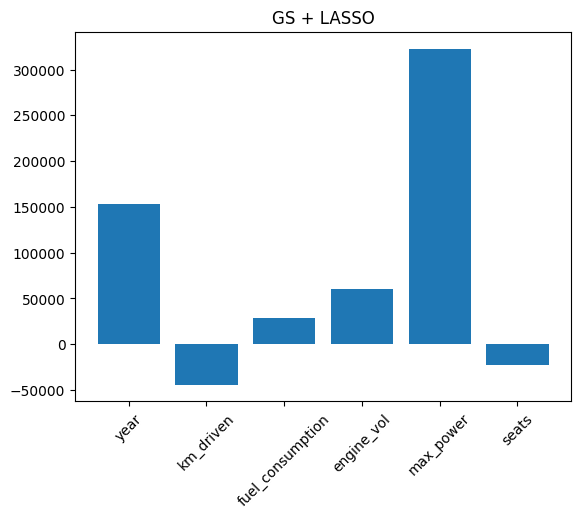

In [35]:
experiments_dict["exp_5_Lasso_GS_scaled"] = Experiment(gs.best_estimator_, X_train, y_train, X_test, y_test)
print_metrics(gs.best_estimator_)
plot_weights(gs.best_estimator_.steps[1][1], "GS + LASSO")

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
    - Сколько грид-сёрчу пришлось обучать моделей? **64 * 64 * 10 = 40960**
    - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [36]:
from sklearn.linear_model import ElasticNet

model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", ElasticNet(random_state=SEED)),
])

param_grid = {
    "model__alpha": np.linspace(0.00001, 100.0, 64),
    "model__l1_ratio": np.linspace(0.0001, 1.0, 64),
    "model__random_state": [SEED],
}

gs = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring="neg_mean_squared_error")
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', ElasticNet(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.00000000e-05, 1.58731143e+00, 3.17461286e+00, 4.76191429e+00,
       6.34921571e+00, 7.93651714e+00, 9.52381857e+00, 1.11111200e+01,
       1.26984214e+01, 1.42857229e+0...
       6.98442857e-01, 7.14314286e-01, 7.30185714e-01, 7.46057143e-01,
       7.61928571e-01, 7.77800000e-01, 7.93671429e-01, 8.09542857e-01,
       8.25414286e-01, 8.41285714e-01, 8.57157143e-01, 8.73028571e-01,
       8.88900000e-01, 9.04771429e-01, 9.20642857e-01, 9.36514286e-01,
       9.52385714e-01, 9.68257143e-01, 9.84128571e-01, 1.00000000e+00]),
                         'model__random_state': [42]},
             scoring='neg_mean_squared_error')

TRAIN:
    R2:    0.5923
    MSE:   116874252567.1795
    RMSE:  341868.7651

TEST:
    R2:    0.5940
    MSE:   233365851675.2124
    RMSE:  483079.5500



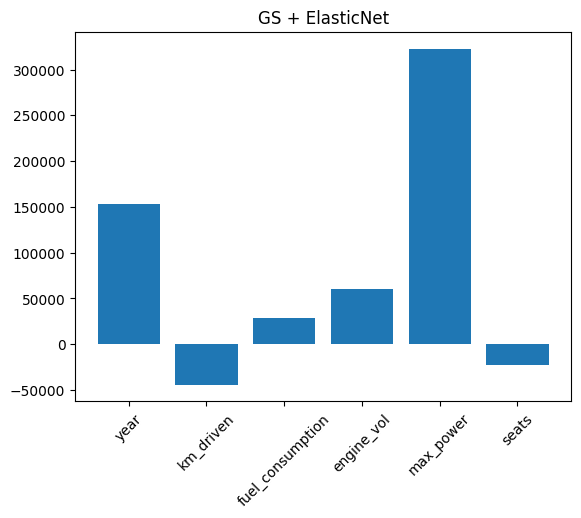

In [37]:
experiments_dict["exp_6_ElasticNet_GS_scaled"] = Experiment(gs.best_estimator_, X_train, y_train, X_test, y_test)
print_metrics(gs.best_estimator_)
plot_weights(gs.best_estimator_.steps[1][1], "GS + ElasticNet")

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [38]:
df_train = df_train.drop("name", axis=1)
df_test = df_test.drop("name", axis=1)

In [39]:
X_train = pd.concat([X_train, df_train.select_dtypes("object")], axis=1)
X_test = pd.concat([X_test, df_test.select_dtypes("object")], axis=1)

In [40]:
assert X_train.shape == (5840, 10)

In [41]:
X_train.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориальные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

**А зачем?** Дело вовсе не в мультиколлинеарности (конечно, в ней, но проблема формулируется нет так), а в том, что в случае с МНК (он же OLS или LinearRegression) мы считаем формулу по матрице с линейно-зависимыми столбцами, так как в сумме ohe-категории сходятся в единичный столбец сдвига. В следующем задании просят использовать `Ridge`-регрессию, и в этом случае вообще пофиг, так как алгоритм sklearn построен не на вычислении формулы, а на численных методах оптимизации. Да и регуляризация устроена так, что матрица $X^TX + \alpha I$ невырожденная, если $\alpha$ не одно из собственных значений $X^TX$. Кроме того, это может быть достаточно пагубной практикой, так что не нужно учить этому студентов. Когда они с этим столкнуться, numpy выдаст им ошибку

Я, конечно, сделаю так, как просит задание, указав `drop="first"`, но в своей рабочей практике предпочел бы не заниматься такими непотребствами, так что моя совесть идет на жертву ради баллов

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_cols = X_train.select_dtypes("number").columns
cat_cols = X_train.select_dtypes("object").columns

column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), num_cols),
    ('ohe', OneHotEncoder(drop="first"), cat_cols),
])

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов? **Очевидно да**

In [43]:
from sklearn.linear_model import Ridge


model = Pipeline([
    ("transformer", column_transformer),
    ("model", Ridge()),
])

param_grid = {
    "model__alpha": np.linspace(0.001, 100.0, 2000),
    "model__random_state": [SEED],
}

gs = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring="r2")
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         Index(['year', 'km_driven', 'fuel_consumption', 'engine_vol', 'max_power',
       'seats'],
      dtype='object')),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object'))])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.00000000e-03, 5.10245123e-02, 1.01049025e-01, ...,
       9.98999510e+01, 9.99499755e+01, 1.00000000e+02], shape=(2000,)),
                         'model__random_state': [42]},
             scoring='r2')

In [44]:
experiments_dict["exp_7_Ridge_GS_scaled_categories"] = Experiment(gs.best_estimator_, X_train, y_train, X_test, y_test)
print_metrics(gs.best_estimator_)

TRAIN:
    R2:    0.6493
    MSE:   100512085773.0842
    RMSE:  317036.4108

TEST:
    R2:    0.6196
    MSE:   218686405126.1404
    RMSE:  467639.1826



# **Часть 4. | Бизнесовая**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса **Лучше всего 6 эксп, где мы еще не накидали категорий, но положа руку на сердце -- все оно отдает одним знакомым запахом. Хотел было поделать FE, по-другому кодировать категории, но в задании ведь не просят, а за учебу мне не платят))**

In [45]:
def business_metric(y_true, y_pred):
    ape = np.abs(y_pred - y_true) / y_true
    ratio = np.sum(ape <= 0.1) /  len(y_true)
    return ratio

In [46]:
for exp_name, exp in experiments_dict.items():
    model = exp["model"].fit(exp["X_train"], exp["y_train"])
    train_pred = model.predict(exp["X_train"])
    test_pred = model.predict(exp["X_test"])

    train_score = business_metric(exp["y_train"], train_pred) * 100
    test_score = business_metric(exp["y_test"], test_pred) * 100

    print(f"Experiment: {exp_name}")
    print(f"  Train score: {train_score:.2f}%")
    print(f"   Test score: {test_score:.2f}%")
    print()

Experiment: exp_0_mean
  Train score: 11.75%
   Test score: 11.00%

Experiment: exp_1_OLS
  Train score: 21.52%
   Test score: 22.70%

Experiment: exp_2_OLS_scaled
  Train score: 21.52%
   Test score: 22.70%

Experiment: exp_3_Lasso_scaled
  Train score: 21.52%
   Test score: 22.70%

Experiment: exp_4_Lasso
  Train score: 21.52%
   Test score: 22.70%

Experiment: exp_5_Lasso_GS_scaled
  Train score: 21.52%
   Test score: 22.60%

Experiment: exp_6_ElasticNet_GS_scaled
  Train score: 21.52%
   Test score: 22.60%

Experiment: exp_7_Ridge_GS_scaled_categories
  Train score: 21.11%
   Test score: 23.60%



# **Часть 5 | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


**Собираем лучшую модель. Чтобы в коде была только логика сервиса, удобно запихнуть всю логику предикта и обработки данных в один пайплайн, а значит и в один файлик**

In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median').fit(df_train_na.select_dtypes("number"))
imputer.statistics_ == medians

year                True
selling_price       True
km_driven           True
fuel_consumption    True
engine_vol          True
max_power           True
seats               True
dtype: bool

In [48]:
_ = experiments_dict["exp_7_Ridge_GS_scaled_categories"]["model"].steps[-1][1]

imputer = ColumnTransformer([
    ('num_imputer', SimpleImputer(strategy='median'), num_cols),
    ('cat_imputer', SimpleImputer(strategy='most_frequent'), cat_cols), # по сути просто костыль для пайплайна
], verbose_feature_names_out=False).set_output(transform="pandas")

scaler_ohe = ColumnTransformer([
    ('scaler', StandardScaler(), num_cols),
    ('ohe', OneHotEncoder(drop="first"), cat_cols),
])

# verbose_feature_names_out=False).set_output(transform="pandas")

save_model = Pipeline([
    ("imputer", imputer), ("scaler_ohe", scaler_ohe),
    ("model", Ridge(alpha=_.alpha, random_state=SEED)),
])

**Проверяем**

In [49]:
X = df_train_na[list(num_cols) + list(cat_cols)].copy()
Xt = df_test_na[list(num_cols) + list(cat_cols)].copy()
y = df_train_na["selling_price"]
yt = df_test_na["selling_price"]

save_model.fit(X, y)

for label, X, y in zip(["train", "test"], [X, Xt], [y, yt]):
    print(f"{label.upper()}:")
    metrics = eval(y, save_model.predict(X))
    for metric_name, metric_val in metrics.items():
        print(f"    {metric_name}:  {' ' * (4 - len(metric_name))}{metric_val:.4f}")
    print()

TRAIN:
    R2:    0.6493
    MSE:   100512085773.0842
    RMSE:  317036.4108

TEST:
    R2:    0.6196
    MSE:   218686405126.1404
    RMSE:  467639.1826



**Сошлось, сохраняем**

In [50]:
import pickle

with open('hw1_best_model.pkl','wb') as f:
    pickle.dump(save_model, f)

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

**Решил приложить не скриншотами, а прям примерами в файле**

**Запуск:**
```
python hw1_fastapi.py
```

**Swagger GUI:**
```
http://localhost:8000/docs
```

In [51]:
import requests
import pandas as pd


outback = {
  "name": "Subaru Outback BR",
  "year": 2012,
  "selling_price": 1800000,
  "km_driven": 275000,
  "fuel": "Petrol",
  "seller_type": "Individual",
  "transmission": "Automatic",
  "owner": "First Owner",
  "mileage": "8.0 kmpl",
  "engine": "3600 CC",
  "max_power": "249 bhp",
  "torque": "350 Nm at 4400rpm",
  "seats": 5
}

outlander = {
  "name": "Mitsubishi Outlander",
  "year": 2021,
  "selling_price": 2100000,
  "km_driven": 60000,
  "fuel": "Petrol",
  "seller_type": "Individual",
  "transmission": "Automatic",
  "owner": "First Owner",
  "mileage": "13.0 kmpl",
  "engine": "2000 CC",
  "max_power": "146 bhp",
  "torque": "196 Nm at 4200 rpm",
  "seats": 5
}

sample_file = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv').head(10)
sample_file.to_csv("sample_file.csv", index=False)

URL = "http://localhost:8000"
HEADERS = {}

**Работа сервиса:**

`/predict_item`:

In [53]:
response = requests.post(f"{URL}/predict_item", json=outback)
if response.status_code == 200:
    print(response.json())

2121205.7700833045


`/predict_items`:

In [54]:
response = requests.post(f"{URL}/predict_items", json={"objects":[outback, outlander]})
if response.status_code == 200:
    print(response.json())

[2121205.7700833045, 1539103.7663416218]


`/predict_csv`:

In [55]:
with open('sample_file.csv', 'rb') as f:
    files = {'file': ('sample_file.csv', f, 'text/csv')}
    headers = {'accept': 'application/json'}
    response = requests.post(f"{URL}/predict_csv", files=files)

if response.status_code == 200:
    with open("prediction_data.csv", "wb") as output_file:
        output_file.write(response.content)
    sample_pred = pd.read_csv("prediction_data.csv")
    
sample_pred

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_predict
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,403199.665485
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,619588.077083
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,434135.265351
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,210659.891703
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,536973.279708
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,54064.754018
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,-449398.379852
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,292480.827070
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,299626.976937
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0,676429.218314


**Как мы видим, все отлично работает**

# **Часть 6 | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит